In [1]:
# Importing the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

# Read cleaned train data:
df_cleaned = pd.read_csv('ED_train_cleaned.csv', index_col='Admission_Date', parse_dates=True)

# Remove unnamed column:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

# Check dataframe info.:
df_cleaned.info()

# Check number of missing values:
df_cleaned.isnull().sum()

# Check drop duplicates: drop 288 rows
df_cleaned = df_cleaned.drop_duplicates()

# Sort dataframe by index: admission date
df_cleaned = df_cleaned.sort_index()

# Filtered dataframe by Admit label: '0':non-admitted, '1':admitted #
###############################################################################
df_admit_0 = df_cleaned[df_cleaned['Admit'] == 0] # only ED non-admitted patients
df_admit_1 = df_cleaned[df_cleaned['Admit'] == 1] # only ED admitted patients

# Compute summary statistics #
###############################################################################
# ED admitted patients only:
df_cleaned_stat = df_cleaned.describe().T
# Reorder columns order in summary dataframe
df_cleaned_stat = df_cleaned_stat[['count','min','max','mean','25%','50%','75%','std']]
# Drop 'Admit' column:
df_cleaned_stat = df_cleaned_stat.drop(['Admit'])
# Print summary stat.:
df_cleaned_stat

C:\Users\yoots\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60672 entries, 2013-11-17 to 2011-11-05
Data columns (total 25 columns):
Gender                 60672 non-null object
Ethnicity              60672 non-null object
LIHN                   60672 non-null object
Avg_Income             60672 non-null float64
Distance               60672 non-null float64
GP_Visits              60672 non-null int64
ED_Visits              60672 non-null int64
Specialist_Visits      60672 non-null int64
Hospital_Admissions    60672 non-null int64
Total_Visits           60672 non-null int64
MRI_Count              60672 non-null int64
GP_Code                60672 non-null object
Pain_Score             60672 non-null int64
Allergy                60672 non-null object
Previous_Medication    60672 non-null int64
Family_History         60672 non-null object
Symptom2Visit_Days     60672 non-null int64
Test_A                 60672 non-null object
Test_B                 60672 non-null float64
Test_C                 60

,count,min,max,mean,25%,50%,75%,std
Avg_Income,60340.0,7117.000000,200001.000000,46112.457193,35135.000000,42247.000000,51937.000000,17875.934691
Distance,60340.0,0.417124,1154.751207,271.687340,139.593732,168.112133,314.192043,251.284897
GP_Visits,60340.0,0.000000,56.000000,1.254806,0.000000,1.000000,2.000000,1.721870
ED_Visits,60340.0,0.000000,8.000000,0.358303,0.000000,0.000000,1.000000,0.556544
Specialist_Visits,60340.0,0.000000,9.000000,0.556430,0.000000,0.000000,1.000000,0.656339
Hospital_Admissions,60340.0,0.000000,5.000000,0.042012,0.000000,0.000000,0.000000,0.230380
Total_Visits,60340.0,1.000000,58.000000,2.211601,1.000000,2.000000,3.000000,1.919398
MRI_Count,60340.0,0.000000,2.000000,0.037521,0.000000,0.000000,0.000000,0.195707
Pain_Score,60340.0,1.000000,5.000000,4.085350,3.000000,5.000000,5.000000,1.446187
Previous_Medication,60340.0,0.000000,3.000000,0.055171,0.000000,0.000000,0.000000,0.244983


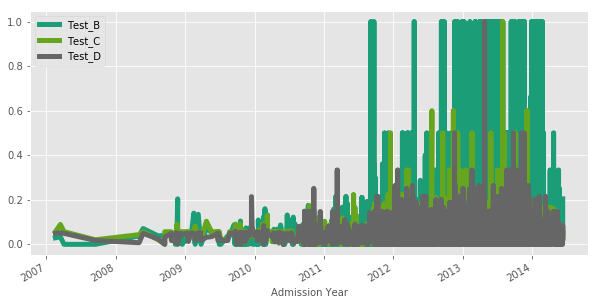

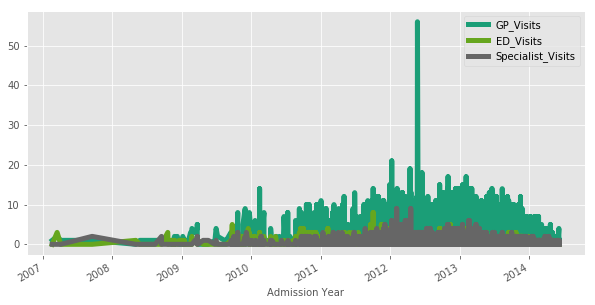

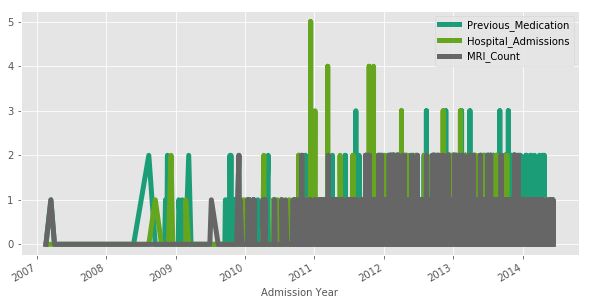

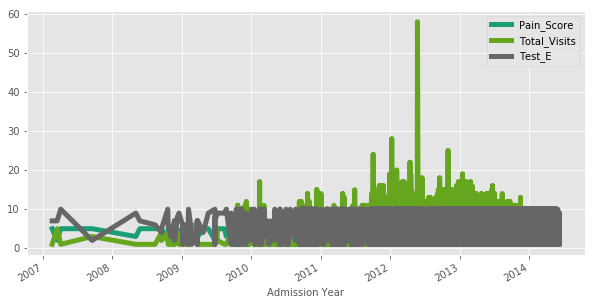

In [2]:
# plot style use:
plt.style.use('ggplot')

# Plot similar scale input features #:
test_cols = ['Test_B','Test_C','Test_D']
visit_cols = ['GP_Visits','ED_Visits','Specialist_Visits']
diag1_cols = ['Previous_Medication','Hospital_Admissions','MRI_Count']
diag2_cols = ['Pain_Score','Total_Visits','Test_E']

# Test results' trend over admission year: ED admission dataset #
df_cleaned.loc[:,test_cols].plot(figsize=(10,5), linewidth=5, fontsize=10, colormap='Dark2')
plt.xlabel('Admission Year', fontsize=10)
plt.show()

# Visit types trend over admission year: ED admission dataset #
plt.figure()
df_cleaned.loc[:,visit_cols].plot(figsize=(10,5), linewidth=5, fontsize=10, colormap='Dark2')
plt.xlabel('Admission Year', fontsize=10)
plt.show()

# diagnostic group1 tests' trend over admission year: ED admission dataset #
plt.figure()
df_cleaned.loc[:,diag1_cols].plot(figsize=(10,5), linewidth=5, fontsize=10, colormap='Dark2')
plt.xlabel('Admission Year', fontsize=10)
plt.show()

# diagnostic group2 tests' trend over admission year: ED admission dataset #
plt.figure()
df_cleaned.loc[:,diag2_cols].plot(figsize=(10,5), linewidth=5, fontsize=10, colormap='Dark2')
plt.xlabel('Admission Year', fontsize=10)
plt.show()

## Resampling: ED Admission data ##
There were quite number of missing admission date on certain year (i.e., 2007). Thus, we decided to test the feasibility of resampling admission data points in following manner.
* Step1: interpolate missing date between 2007 to 2014 at daily freq.
* Step2: resample time point and aggregate by mean over month from 2007 to 2014.

In [3]:
# Use num_cols: Avg_Income, Distance, GP_Visits, ..., ED_Visits
num_cols = ['Avg_Income', 'Distance', 'GP_Visits', 'ED_Visits', 
            'Specialist_Visits', 'Hospital_Admissions', 'Total_Visits', 
            'MRI_Count', 'Pain_Score', 'Previous_Medication', 'Symptom2Visit_Days', 
            'Test_B', 'Test_C', 'Test_D', 'Test_E']

# Filtered "numerical features" only:
df2 = df_cleaned.loc[:, num_cols]

# Daily data: upsampling by interpolation #
###########################################
ED_daily_1 = df2.resample('D').first().ffill().add_suffix('_ffill')
ED_daily_2 = df2.resample('D').first().interpolate()

# Check missing time point:
print(ED_daily_1.isnull().sum())
print(ED_daily_2.isnull().sum())

# Monthly data: downsampling by aggregation #
#############################################
# Resampling from imputed daily freq. --> monthly freq. by mean aggregation:
ED_monthly_1 = ED_daily_1.resample('M').mean()
ED_monthly_2 = ED_daily_2.resample('M').mean()

Avg_Income_ffill             0
Distance_ffill               0
GP_Visits_ffill              0
ED_Visits_ffill              0
Specialist_Visits_ffill      0
Hospital_Admissions_ffill    0
Total_Visits_ffill           0
MRI_Count_ffill              0
Pain_Score_ffill             0
Previous_Medication_ffill    0
Symptom2Visit_Days_ffill     0
Test_B_ffill                 0
Test_C_ffill                 0
Test_D_ffill                 0
Test_E_ffill                 0
dtype: int64
Avg_Income             0
Distance               0
GP_Visits              0
ED_Visits              0
Specialist_Visits      0
Hospital_Admissions    0
Total_Visits           0
MRI_Count              0
Pain_Score             0
Previous_Medication    0
Symptom2Visit_Days     0
Test_B                 0
Test_C                 0
Test_D                 0
Test_E                 0
dtype: int64


## Rolling Mean: time-series extract using [[]] double brackets ## 

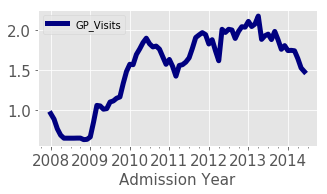

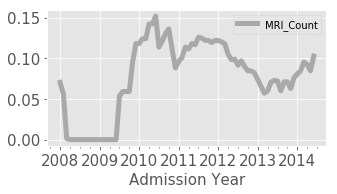

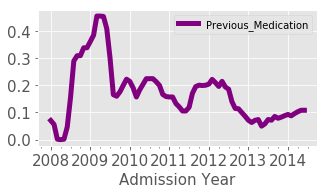

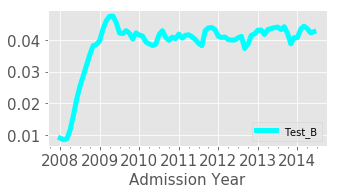

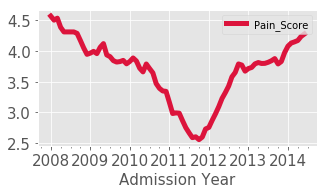

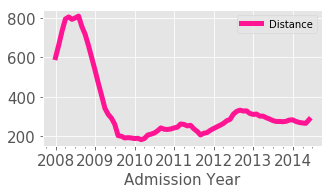

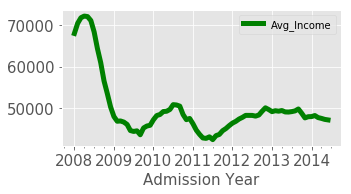

In [60]:
# Test: time-series extract #
GP_Visits = ED_monthly_2[['GP_Visits']]
MRI_Count = ED_monthly_2[['MRI_Count']]
Prev_Med = ED_monthly_2[['Previous_Medication']]
Test_B = ED_monthly_2[['Test_B']]
Pain_Score = ED_monthly_2[['Pain_Score']]
Avg_Income = ED_monthly_2[['Avg_Income']]
Distance = ED_monthly_2[['Distance']]

# Rolling Mean: over 12 months (monthly) - GP Visits
GP_Visits.rolling(12).mean().plot(figsize=(5,2.5), linewidth=5, fontsize=15, color='navy')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Rolling Mean: over 12 months (monthly) - MRI Count
MRI_Count.rolling(12).mean().plot(figsize=(5,2.5), linewidth=5, fontsize=15, color='darkgray')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Rolling Mean: over 12 months (monthly) - Previous Medication
Prev_Med.rolling(12).mean().plot(figsize=(5,2.5), linewidth=5, fontsize=15, color='purple')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Rolling Mean: over 12 months (monthly) - Test_B
Test_B.rolling(12).mean().plot(figsize=(5,2.5), linewidth=5, fontsize=15, color='cyan')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Rolling Mean: over 12 months (monthly) - Pain Score
Pain_Score.rolling(12).mean().plot(figsize=(5,2.5), linewidth=5, fontsize=15, color='crimson')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Rolling Mean: over 12 months (monthly) - Distance
Distance.rolling(12).mean().plot(figsize=(5,2.5), linewidth=5, fontsize=15, color='deeppink')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Rolling Mean: over 12 months (monthly) - Average Income
Avg_Income.rolling(12).mean().plot(figsize=(5,2.5), linewidth=5, fontsize=15, color='green')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

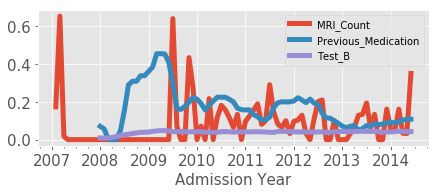

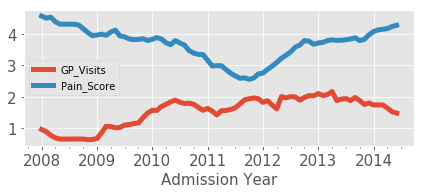

In [61]:
# Plot rolling mean of MRI count, Prev Med and Test_B on a single figure #
df_diag1 = pd.concat([MRI_Count, Prev_Med.rolling(12).mean(), Test_B.rolling(12).mean()], axis=1)
df_diag1.plot(figsize=(7,2.5), linewidth=5, fontsize=15)
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Plot rolling mean of GP Visits and Pain Score on a single figure #
df_diag2 = pd.concat([GP_Visits.rolling(12).mean(), Pain_Score.rolling(12).mean()], axis=1)
df_diag2.plot(figsize=(7,2.5), linewidth=5, fontsize=15)
plt.xlabel('Admission Year', fontsize=15)
plt.show()

### First-order differencing ###

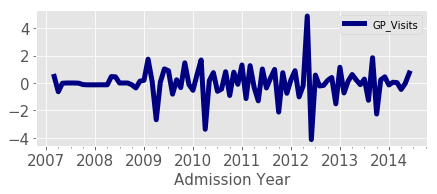

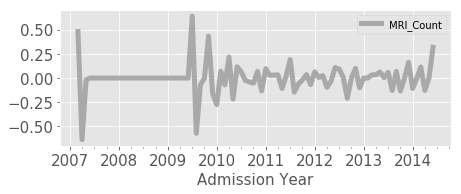

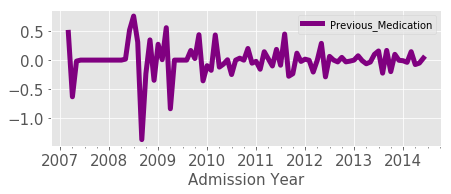

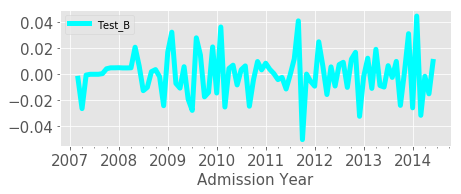

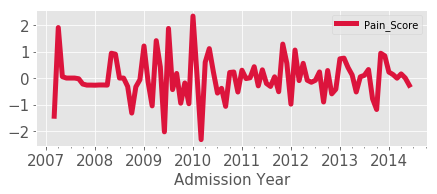

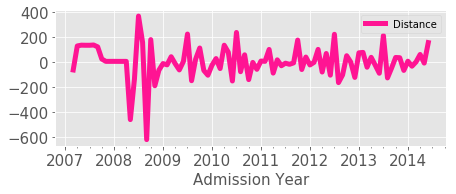

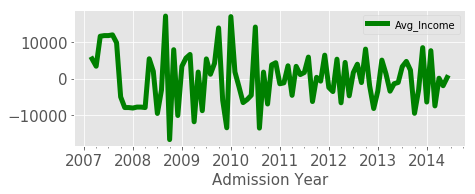

In [65]:
# First order difference plot: GP Visits #
GP_Visits.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15, color='navy')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# First order difference plot: MRI count #
MRI_Count.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15, color='darkgray')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# First order difference plot: Previous Medicine #
Prev_Med.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15, color='purple')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# First order difference plot: Test_B #
Test_B.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15, color='cyan')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# First order difference plot: Pain Score #
Pain_Score.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15, color='crimson')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# First order difference plot: Distance #
Distance.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15, color='deeppink')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# First order difference plot: Average Income #
Avg_Income.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15, color='green')
plt.xlabel('Admission Year', fontsize=15)
plt.show()

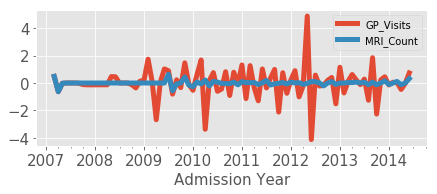

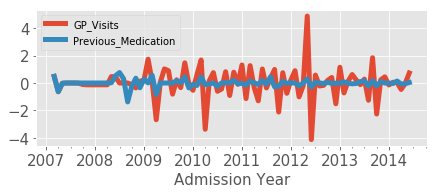

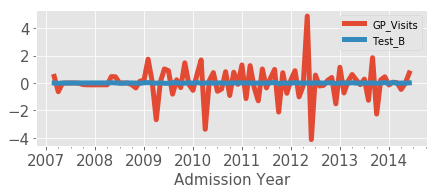

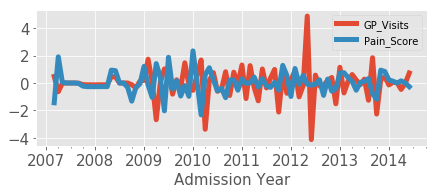

In [64]:
# Plot first-order difference plot of GP Visits and MRI Count on a single figure #
diff_gp_mri = pd.concat([GP_Visits, MRI_Count], axis=1)
diff_gp_mri.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15)
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Plot first-order difference plot of GP Visits and Previous Medicine on a single figure #
diff_gp_med = pd.concat([GP_Visits, Prev_Med], axis=1)
diff_gp_med.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15)
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Plot first-order difference plot of GP Visits and Test_B on a single figure #
diff_gp_test_b = pd.concat([GP_Visits, Test_B], axis=1)
diff_gp_test_b.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15)
plt.xlabel('Admission Year', fontsize=15)
plt.show()

# Plot first-order difference plot of GP Visits and Pain Score on a single figure #
diff_gp_pain = pd.concat([GP_Visits, Pain_Score], axis=1)
diff_gp_pain.diff().plot(figsize=(7,2.5), linewidth=5, fontsize=15)
plt.xlabel('Admission Year', fontsize=15)
plt.show()

### Correlation Matrix by target group (admit label) ###

In [6]:
grp1_cols = ['Test_B','Test_C','Test_D','Test_E','Admit']
grp2_cols = ['GP_Visits','ED_Visits','Specialist_Visits','Total_Visits','Admit']
grp3_cols = ['Distance','Symptom2Visit_Days','Avg_Income','Admit']
grp4_cols = ['Pain_Score','Previous_Medication','Hospital_Admissions','MRI_Count','Admit']
grp5_cols = ['GP_Visits','Previous_Medication','MRI_Count','Avg_Income','Pain_Score','Admit']

df_cleaned.loc[:,grp1_cols].groupby('Admit').corr()

Test_B    Test_C    Test_D    Test_E
Admit                                               
0     Test_B  1.000000  0.190504  0.184168  0.003707
      Test_C  0.190504  1.000000  0.537943  0.003548
      Test_D  0.184168  0.537943  1.000000  0.010529
      Test_E  0.003707  0.003548  0.010529  1.000000
1     Test_B  1.000000 -0.124619 -0.141428 -0.007168
      Test_C -0.124619  1.000000  0.180957  0.007863
      Test_D -0.141428  0.180957  1.000000  0.014454
      Test_E -0.007168  0.007863  0.014454  1.000000

In [7]:
df_cleaned.loc[:,grp2_cols].groupby('Admit').corr()

ED_Visits  GP_Visits  Specialist_Visits  Total_Visits
Admit                                                                         
0     ED_Visits           1.000000   0.033670          -0.347216      0.222406
      GP_Visits           0.033670   1.000000          -0.017294      0.901762
      Specialist_Visits  -0.347216  -0.017294           1.000000      0.257135
      Total_Visits        0.222406   0.901762           0.257135      1.000000
1     ED_Visits           1.000000   0.183171           0.048715      0.402117
      GP_Visits           0.183171   1.000000           0.227329      0.927931
      Specialist_Visits   0.048715   0.227329           1.000000      0.470545
      Total_Visits        0.402117   0.927931           0.470545      1.000000

In [8]:
df_cleaned.loc[:,grp3_cols].groupby('Admit').corr()

Avg_Income  Distance  Symptom2Visit_Days
Admit                                                             
0     Avg_Income            1.000000 -0.026945           -0.007539
      Distance             -0.026945  1.000000            0.088638
      Symptom2Visit_Days   -0.007539  0.088638            1.000000
1     Avg_Income            1.000000 -0.033853           -0.018723
      Distance             -0.033853  1.000000           -0.091322
      Symptom2Visit_Days   -0.018723 -0.091322            1.000000

In [9]:
df_cleaned.loc[:,grp4_cols].groupby('Admit').corr()

Hospital_Admissions  MRI_Count  Pain_Score  \
Admit                                                                   
0     Hospital_Admissions             1.000000   0.008721    0.040103   
      MRI_Count                       0.008721   1.000000   -0.137757   
      Pain_Score                      0.040103  -0.137757    1.000000   
      Previous_Medication             0.019355   0.075294   -0.159509   
1     Hospital_Admissions             1.000000  -0.025805   -0.018518   
      MRI_Count                      -0.025805   1.000000   -0.225475   
      Pain_Score                     -0.018518  -0.225475    1.000000   
      Previous_Medication             0.042113   0.070656   -0.072893   

                           Previous_Medication  
Admit                                           
0     Hospital_Admissions             0.019355  
      MRI_Count                       0.075294  
      Pain_Score                     -0.159509  
      Previous_Medication             1.000000  
1     Hospital_Admissions             0.042113  
      MRI_Count                       0.070656  
      Pain_Score                     -0.072893  
      Previous_Medication             1.000000

In [10]:
df_cleaned.loc[:,grp5_cols].groupby('Admit').corr()

Avg_Income  GP_Visits  MRI_Count  Pain_Score  \
Admit                                                                     
0     Avg_Income             1.000000   0.153415   0.109842   -0.013290   
      GP_Visits              0.153415   1.000000   0.283688   -0.099696   
      MRI_Count              0.109842   0.283688   1.000000   -0.137757   
      Pain_Score            -0.013290  -0.099696  -0.137757    1.000000   
      Previous_Medication    0.027376   0.240832   0.075294   -0.159509   
1     Avg_Income             1.000000  -0.003947   0.043241   -0.043495   
      GP_Visits             -0.003947   1.000000   0.200432   -0.260688   
      MRI_Count              0.043241   0.200432   1.000000   -0.225475   
      Pain_Score            -0.043495  -0.260688  -0.225475    1.000000   
      Previous_Medication   -0.081631   0.127461   0.070656   -0.072893   

                           Previous_Medication  
Admit                                           
0     Avg_Income                      0.027376  
      GP_Visits                       0.240832  
      MRI_Count                       0.075294  
      Pain_Score                     -0.159509  
      Previous_Medication             1.000000  
1     Avg_Income                     -0.081631  
      GP_Visits                       0.127461  
      MRI_Count                       0.070656  
      Pain_Score                     -0.072893  
      Previous_Medication             1.000000

In [51]:
# Dataframe: 6 selected features
diag_grp = pd.concat([GP_Visits, MRI_Count, Prev_Med,
    Test_B, Distance, Avg_Income], axis=1)

# Correlation matrix on first-order difference: 'seasonal component'
diag_grp.diff().corr()

,GP_Visits,MRI_Count,Previous_Medication,Test_B,Distance,Avg_Income
GP_Visits,1.000000,0.173315,0.392388,0.240544,0.012109,0.147493
MRI_Count,0.173315,1.000000,0.232771,-0.013984,0.122961,0.003002
Previous_Medication,0.392388,0.232771,1.000000,0.004055,0.286415,0.002389
Test_B,0.240544,-0.013984,0.004055,1.000000,-0.142618,0.148872
Distance,0.012109,0.122961,0.286415,-0.142618,1.000000,-0.024823
Avg_Income,0.147493,0.003002,0.002389,0.148872,-0.024823,1.000000


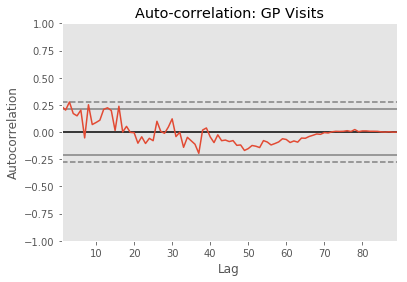

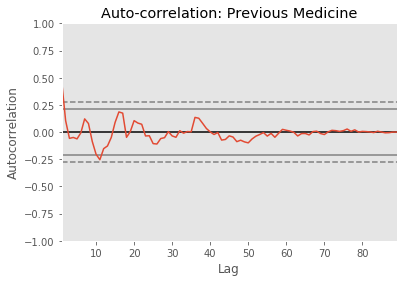

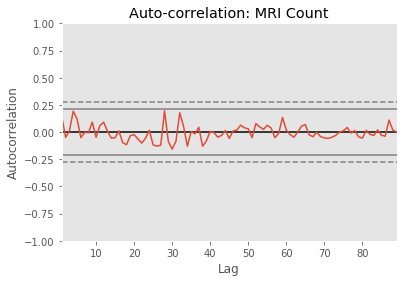

In [69]:
# Plot auto-correlation:
# Auto-correlation: GP Visits #
pd.plotting.autocorrelation_plot(GP_Visits);
plt.title('Auto-correlation: GP Visits')
plt.show()

# Auto-correlation: Previous Medication #
pd.plotting.autocorrelation_plot(Prev_Med);
plt.title('Auto-correlation: Previous Medicine')
plt.show()

# Auto-correlation: MRI count #
pd.plotting.autocorrelation_plot(MRI_Count);
plt.title('Auto-correlation: MRI Count')
plt.show()